In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# API_KEY = 'e4cf224336ce2a202bd885e2a29c3e6d'  

# Define the MovielensInteractionGraph class
class MovielensInteractionGraph:
    def __init__(self, user_data, item_data, edges):
        self.user_data = user_data
        self.item_data = item_data
        self.edges = edges
        self.all_edges = set(edges)


# Function to visualize the interaction graph with items on one side and users on the other
def visualize_interaction_graph(igraph, sample_size=100):
    G = nx.Graph()

    # Sample edges to visualize
    sampled_edges = list(igraph.all_edges)
    if sample_size < len(sampled_edges):
        sampled_edges = random.sample(sampled_edges, sample_size)

    # Add edges from the interaction graph
    for edge in sampled_edges:
        user_id, item_id = edge
        G.add_edge(f"user_{user_id}", f"item_{item_id}")

    # Separate users and items
    user_nodes = [node for node in G.nodes if node.startswith("user_")]
    item_nodes = [node for node in G.nodes if node.startswith("item_")]

    # Create a bipartite layout
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(user_nodes))  # Users on the left
    pos.update((node, (2, i)) for i, node in enumerate(item_nodes))  # Items on the right

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=['skyblue' if node.startswith("user_") else 'lightgreen' for node in G.nodes], font_size=8, font_weight='bold')
    plt.title(f"User-Item Interaction Graph (Sampled {sample_size} edges)")
    plt.show()

# Function to visualize user interactions
def visualize_user_interactions(igraph, user_id, sample_size=50):
    G = nx.Graph()

    # Filter edges for the specified user
    user_edges = [edge for edge in igraph.edges if edge[0] == user_id]
    if sample_size < len(user_edges):
        user_edges = random.sample(user_edges, sample_size)

    # Add edges from the interaction graph
    for edge in user_edges:
        _, item_id = edge
        G.add_edge(f"user_{user_id}", f"item_{item_id}")

    # Separate users and items
    user_nodes = [f"user_{user_id}"]
    item_nodes = [f"item_{item_id}" for _, item_id in user_edges]

    # Create a bipartite layout
    pos = {}
    pos.update((node, (1, i)) for i, node in enumerate(user_nodes))  # Users on the left
    pos.update((node, (2, i)) for i, node in enumerate(item_nodes))  # Items on the right

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=True, node_size=50, node_color=['skyblue' if node.startswith("user_") else 'lightgreen' for node in G.nodes], font_size=8, font_weight='bold')
    plt.title(f"Interactions of User {user_id} (Sampled {sample_size} edges)")
    plt.show()
 

In [40]:

# Load the data (replace these file paths with the actual paths to your data)
users_file_path = 'DATASET/ml-1m/users.dat'
ratings_file_path = 'DATASET/ml-1m/ratings.dat'
movies_file_path = 'DATASET/ml-1m/movies.dat'

# Read the data into DataFrames with the correct encoding
users_df = pd.read_csv(users_file_path, sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
ratings_df = pd.read_csv(ratings_file_path, sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
movies_df = pd.read_csv(movies_file_path, sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')


In [41]:

# Convert DataFrames to the required format
user_data = users_df.set_index('UserID').to_dict('index')
item_data = movies_df.set_index('MovieID').to_dict('index')
edges = [tuple(x) for x in ratings_df[['UserID', 'MovieID']].to_numpy()]


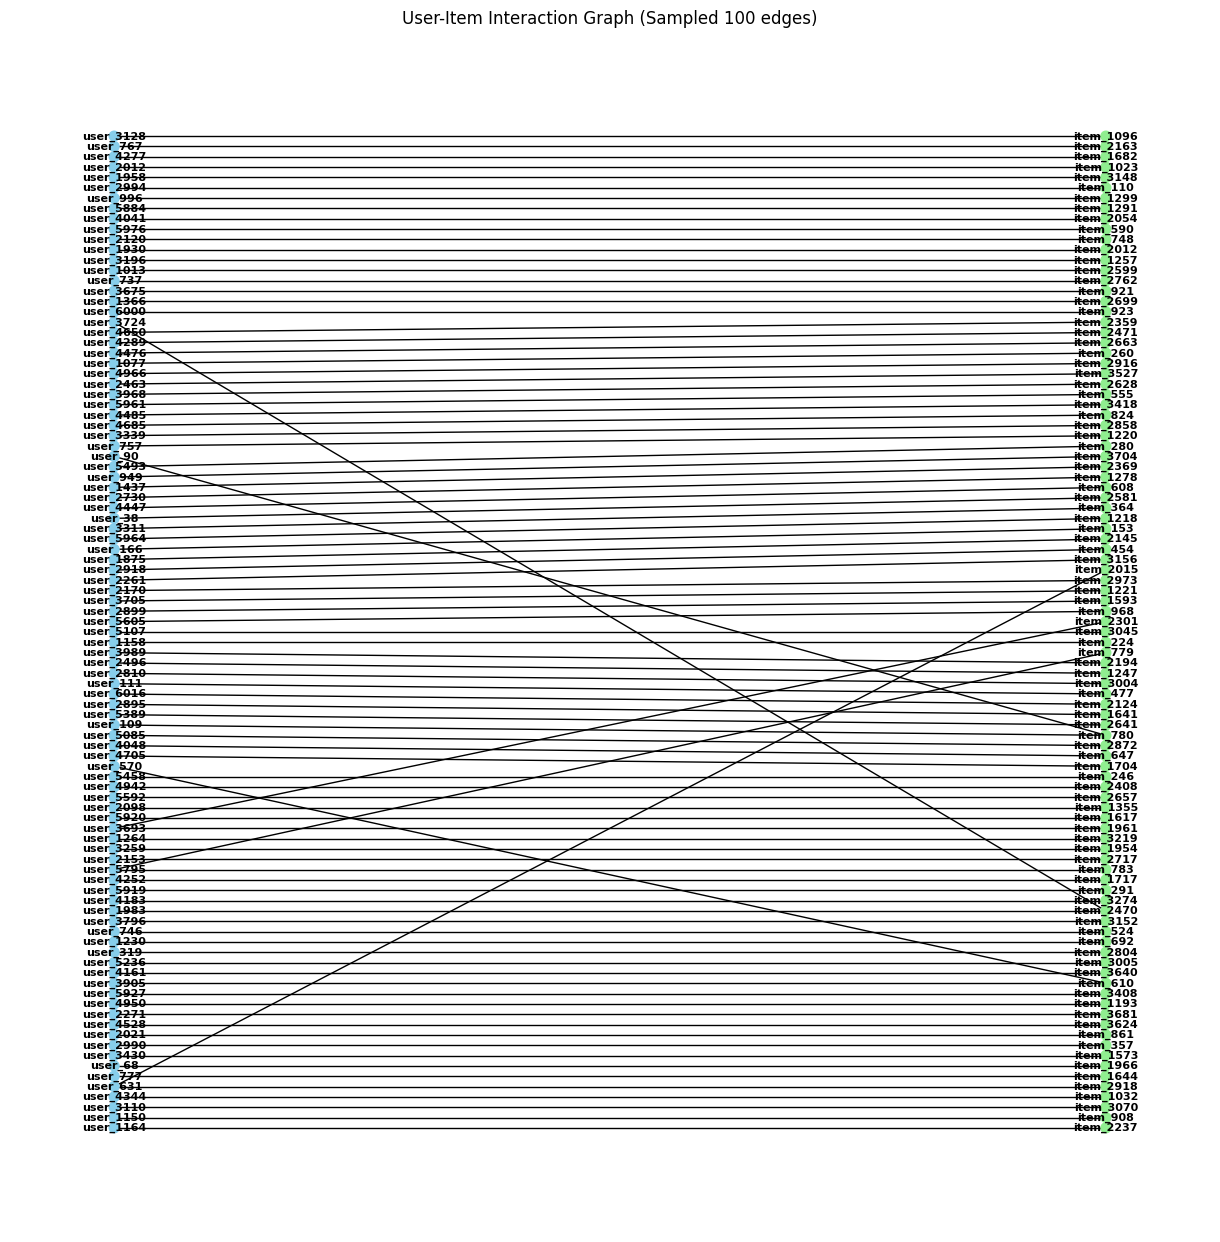

In [46]:
# Create the interaction graph
igraph = MovielensInteractionGraph(user_data, item_data, edges)

# Visualize the graph with a sample size
visualize_interaction_graph(igraph, sample_size=100)

# EDA on Apple Music Dataset

In [97]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the DataFrame from the CSV file
df_user = pd.read_csv('user_info.csv')

# Display the DataFrame
df_user.head()

,name,realname,country
0,RJ,Richard Jones,United Kingdom
1,franhale,Fran,United Kingdom
2,eartle,Michael Coffey,United Kingdom
3,massdosage,Mass Dosage,United Kingdom
4,Knapster01,Matt Knapman,United Kingdom


In [98]:
# Create a copy of the dataframe to not modify the original csv
df_user_copy = df_user.copy()
df_user_copy

,name,realname,country
0,RJ,Richard Jones,United Kingdom
1,franhale,Fran,United Kingdom
2,eartle,Michael Coffey,United Kingdom
3,massdosage,Mass Dosage,United Kingdom
4,Knapster01,Matt Knapman,United Kingdom
...,...,...,...
5995,Elenc,Eleni,Croatia
5996,poligoth,Jorge,Mexico
5997,bamgirl,Sandra,Finland
5998,carlyray,Carly Leigh,Canada


In [99]:
df_user_copy.isna().any()

name        False
realname     True
country     False
dtype: bool

In [100]:
# Check for duplicates
dupes= df_user_copy.duplicated().any()
dupes

False

In [101]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [102]:
df_user_copy['country'].unique()

array(['United Kingdom', 'France', 'United States', 'Switzerland',
       'Austria', 'Australia', 'Sweden', 'Canada', 'Germany', 'Italy',
       'Belgium', 'Uganda', 'Japan', 'Iceland', 'Poland', 'Portugal',
       'Hungary', 'Czech Republic', 'Israel', 'Russian Federation',
       'Norway', 'Netherlands', 'Denmark', 'South Africa', 'Brazil',
       'Aruba', 'Morocco', 'Belarus', 'Slovakia', 'Finland', 'Malaysia',
       'Ireland', 'Mexico', 'Romania', 'Spain', 'Croatia', 'Antarctica',
       'Indonesia', 'Greece', 'Macedonia', 'Lithuania', 'India', 'Chile',
       'New Zealand', 'Slovenia', 'Serbia', 'Turkey', 'Gabon',
       'South Georgia and the South Sandwich Islands', 'Tunisia',
       'Algeria', 'Argentina', 'Colombia', 'Egypt', 'Ukraine',
       'Costa Rica', 'Iran, Islamic Republic of', 'Peru', 'Venezuela',
       'El Salvador', 'Bosnia and Herzegovina', 'Zimbabwe', 'Mongolia',
       'China', 'Estonia', 'Bulgaria', 'Cocos (Keeling) Islands',
       'Puerto Rico', 'Paraguay', 

In [103]:
country_counts = df_user_copy['country'].value_counts()
country_counts

country
United States                       1140
United Kingdom                       690
Brazil                               658
Poland                               502
Germany                              469
                                    ... 
Greenland                              1
Western Sahara                         1
Guatemala                              1
Lao People's Democratic Republic       1
Madagascar                             1
Name: count, Length: 130, dtype: int64

In [104]:
# Calculate the country value counts by percentages
country_counts_percent = (country_counts / country_counts.sum()) * 100
 
country_counts_percent

country
United States                       19.000000
United Kingdom                      11.500000
Brazil                              10.966667
Poland                               8.366667
Germany                              7.816667
                                      ...    
Greenland                            0.016667
Western Sahara                       0.016667
Guatemala                            0.016667
Lao People's Democratic Republic     0.016667
Madagascar                           0.016667
Name: count, Length: 130, dtype: float64

In [106]:
for x in df_user_copy['country']:
    if (x != 'United States') or x != 'United Kingdom' or x != 'Brazil' or x != 'Poland' or x != 'Germany':
        x = 'Other'

In [107]:
less_than = pd.DataFrame(country_counts_percent[5:])
less_than

,count
country,
Russian Federation,4.916667
Finland,2.516667
Mexico,2.433333
Netherlands,1.833333
Ukraine,1.750000
...,...
Greenland,0.016667
Western Sahara,0.016667
Guatemala,0.016667


In [112]:
df_user_copy['country'].unique()

array(['United Kingdom', 'France', 'United States', 'Switzerland',
       'Austria', 'Australia', 'Sweden', 'Canada', 'Germany', 'Italy',
       'Belgium', 'Uganda', 'Japan', 'Iceland', 'Poland', 'Portugal',
       'Hungary', 'Czech Republic', 'Israel', 'Russian Federation',
       'Norway', 'Netherlands', 'Denmark', 'South Africa', 'Brazil',
       'Aruba', 'Morocco', 'Belarus', 'Slovakia', 'Finland', 'Malaysia',
       'Ireland', 'Mexico', 'Romania', 'Spain', 'Croatia', 'Antarctica',
       'Indonesia', 'Greece', 'Macedonia', 'Lithuania', 'India', 'Chile',
       'New Zealand', 'Slovenia', 'Serbia', 'Turkey', 'Gabon',
       'South Georgia and the South Sandwich Islands', 'Tunisia',
       'Algeria', 'Argentina', 'Colombia', 'Egypt', 'Ukraine',
       'Costa Rica', 'Iran, Islamic Republic of', 'Peru', 'Venezuela',
       'El Salvador', 'Bosnia and Herzegovina', 'Zimbabwe', 'Mongolia',
       'China', 'Estonia', 'Bulgaria', 'Cocos (Keeling) Islands',
       'Puerto Rico', 'Paraguay', 

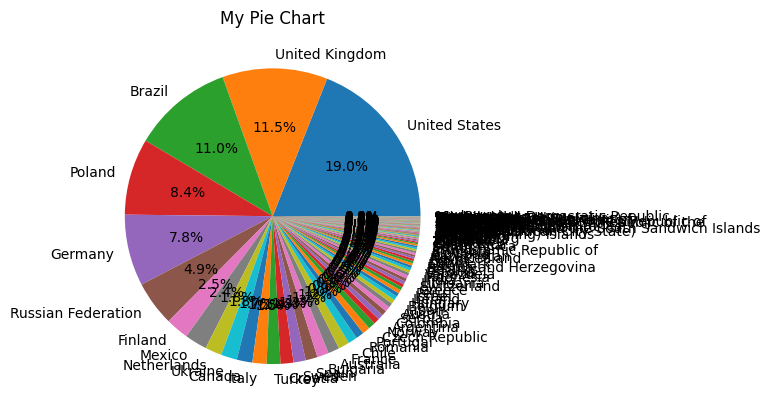

In [110]:
plt.pie(df_user_copy['country'].value_counts(), labels=df_user_copy['country'].value_counts().index, autopct='%1.1f%%')
plt.title('My Pie Chart')
plt.show()

In [111]:
# Load the data (replace these file paths with the actual paths to your data)
users_file_path = 'DATASET/ml-1m/users.dat'
ratings_file_path = 'DATASET/ml-1m/ratings.dat'
items_file_path = 'items.csv'

# Read the data into DataFrames with the correct encoding
users_df = pd.read_csv(users_file_path, sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], encoding='ISO-8859-1')
ratings_df = pd.read_csv(ratings_file_path, sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'], encoding='ISO-8859-1')
movies_df = pd.read_csv(movies_file_path, sep='::', engine='python', names=['MovieID', 'Title', 'Genres'], encoding='ISO-8859-1')


NameError: name 'movies_file_path' is not defined